Copyright (C) 2016 Glencoe Software, Inc. All Rights Reserved.

This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA.

# Basic OMERO API calls in python

* Connect to OMERO server
* List images in the Dataset
* Show image metadata
* Render image
* Show raw image planes
* Find images using key-value pairs

### Connect to the OMERO server

In [21]:
%matplotlib notebook

'matplotlib (1.3.1)'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

from IPython.display import display, HTML

In [2]:
import omero
from omero.gateway import BlitzGateway

import pprint

In [ ]:
from getpass import getpass
conn = BlitzGateway(
    raw_input("Username: "), getpass("OMERO Password: "),
    host=raw_input("Host: "), port=int(raw_input("Port: ")))
conn.connect()


### User info

In [4]:
user = conn.getUser()
print "Current user:"
print "   ID:", user.getId()
print "   Username:", user.getName()
print "   Full Name:", user.getFullName()
print "Member of:"
for g in conn.getGroupsMemberOf():
    print "   ID:", g.getName(), " Name:", g.getId()
group = conn.getGroupFromContext()
print "Current group: ", group.getName()

Current user:
   ID: 852
   Username: emil.rozbicki
   Full Name: Emil Rozbicki
Member of:
   ID: PerkinElmer Demo (ra)  Name: 1003
   ID: Study C (rw)  Name: 905
   ID: Study B (ra)  Name: 904
   ID: PerkinElmer Demo (rw)  Name: 1004
   ID: emil.rozbicki  Name: 953
   ID: zeiss-czi  Name: 1053
   ID: Study A (ro)  Name: 903
Current group:  Study B (ra)


### Dataset listing

In [5]:
dataset_id = 2602
dataset = conn.getObject("Dataset", dataset_id)
print "\nImages in Dataset:", dataset.getName()
for image in dataset.listChildren():
    print "  Name: %s, Id: %s" % (image.name, image.id)


Images in Dataset: 3D Images
  Name: Fig4D_left.dv, Id: 155983
  Name: Fig4D_middle.dv, Id: 155984
  Name: Fig4D_right.dv, Id: 155985
  Name: HumanCells, Id: 156351


### Image metadata

In [7]:
image_id = 155983
image = conn.getObject("Image", image_id)
print "\nImage:%s" % image_id
print "=" * 50
print image.getName(), image.getDescription()
# Retrieve information about an image.
print " Size X:", image.getSizeX()
print " Size Y:", image.getSizeY()
print " Size Z:", image.getSizeZ()
print " Size C:", image.getSizeC()
print " Size T:", image.getSizeT()


Image:155983
Fig4D_left.dv 
 Size X: 337
 Size Y: 340
 Size Z: 54
 Size C: 4
 Size T: 1


### Render image

<IPython.core.display.Javascript object>


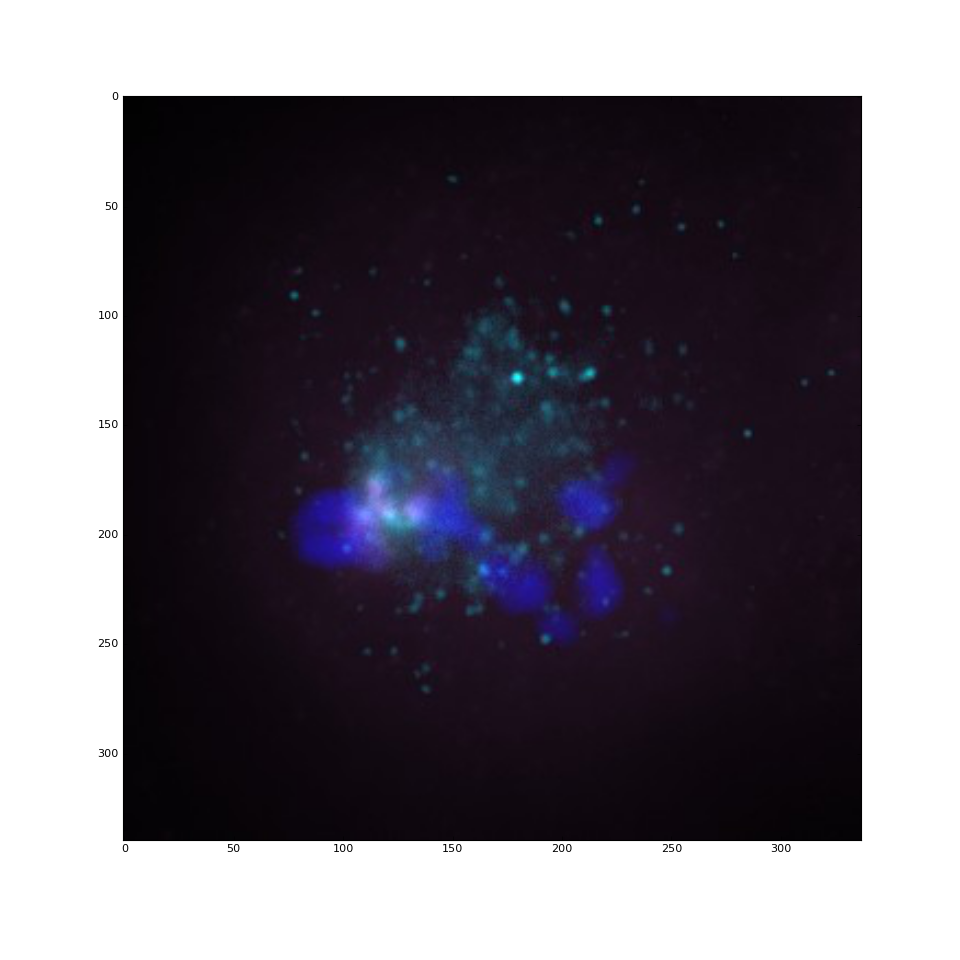

In [24]:
z = 0
t = 0
renderedImage = image.renderImage(z, t)
fig = plt.figure()
plt.imshow(renderedImage)

### Raw image planes

<IPython.core.display.Javascript object>


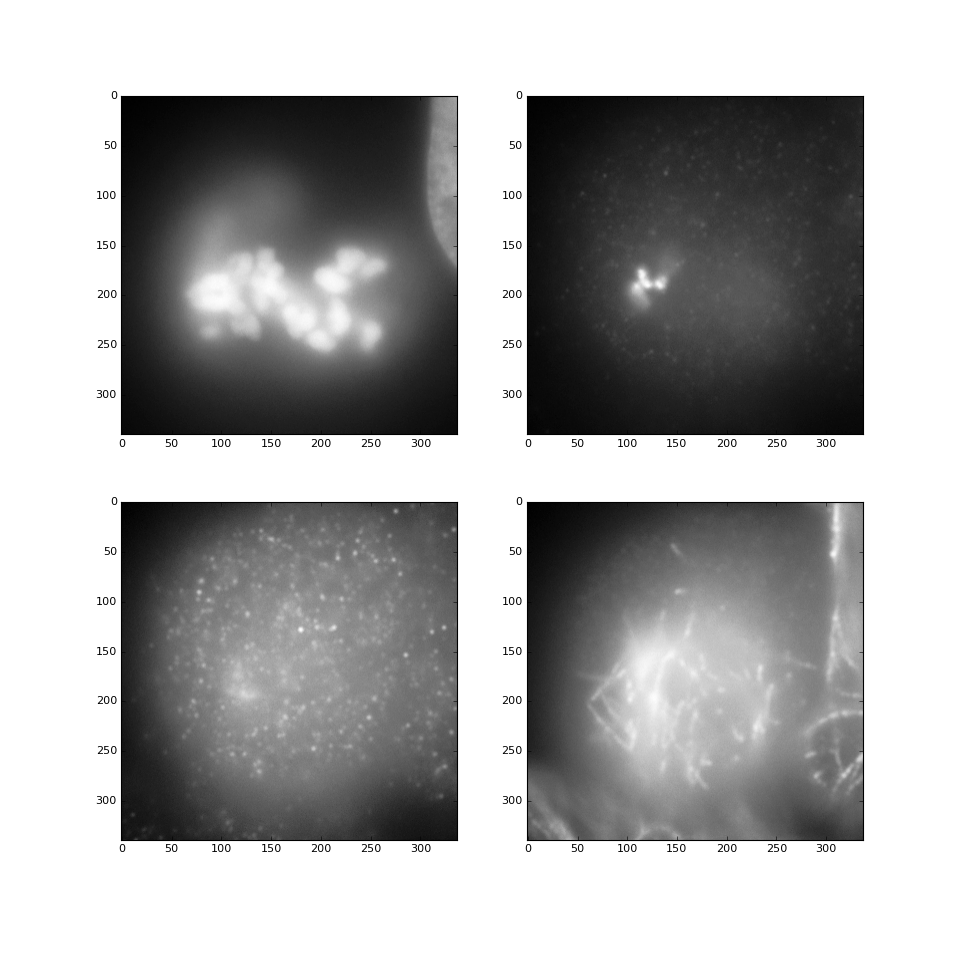

In [23]:
%matplotlib notebook

pixels = image.getPrimaryPixels()
planes = []
fig = plt.figure()
for channel in range(4):
    planes.append(pixels.getPlane(z, channel, t))
    ax = fig.add_subplot(2, 2, channel + 1)
    imshow(planes[channel], cmap='Greys_r')

### Query Service

In [66]:
key = "Slide - Tissue Type"
value = "Heart"

query = \
    "SELECT image.name, ma.name, ma.value FROM Image AS image " \
    "LEFT OUTER JOIN image.annotationLinks as links " \
    "LEFT OUTER JOIN links.child as annotation " \
    "LEFT OUTER JOIN annotation.mapValue as ma " \
    "WHERE annotation MEMBER OF MapAnnotation " \
    "AND ma.name = :key AND ma.value = :value"

params = omero.sys.ParametersI()
params.add("key", omero.rtypes.rstring(key))
params.add("value", omero.rtypes.rstring(value))
query_service = conn.getQueryService()
image_names = query_service.projection(query, params)
print "Found %i images" % len(image_names)
for image_name in image_names:
    print "  %s" % image_name[0].val

Found 15 images
  TCGA-OR-A5J8-01A-01-TS1.87E81ECA-CE5E-4839-8840-4937743A70DC.svs
  TCGA-OR-A5J8-01A-01-TS1.87E81ECA-CE5E-4839-8840-4937743A70DC.svs [label image]
  TCGA-OR-A5J8-01A-01-TS1.87E81ECA-CE5E-4839-8840-4937743A70DC.svs [macro image]
  TCGA-OR-A5LD-01A-01-TSA.C5103F20-E171-4670-B989-47D380003BE0.svs
  TCGA-OR-A5LD-01A-01-TSA.C5103F20-E171-4670-B989-47D380003BE0.svs [label image]
  TCGA-OR-A5LD-01A-01-TSA.C5103F20-E171-4670-B989-47D380003BE0.svs [macro image]
  TCGA-OR-A5LA-01A-01-TS1.309EB684-5588-440E-A14E-0F0E50237C95.svs
  TCGA-OR-A5LA-01A-01-TS1.309EB684-5588-440E-A14E-0F0E50237C95.svs [label image]
  TCGA-OR-A5LA-01A-01-TS1.309EB684-5588-440E-A14E-0F0E50237C95.svs [macro image]
  TCGA-OR-A5LK-01A-01-TSA.3E8C76DD-C08C-4EF4-9E99-C4280F0CD4CE.svs
  TCGA-OR-A5LK-01A-01-TSA.3E8C76DD-C08C-4EF4-9E99-C4280F0CD4CE.svs [label image]
  TCGA-OR-A5LK-01A-01-TSA.3E8C76DD-C08C-4EF4-9E99-C4280F0CD4CE.svs [macro image]
  TCGA-OR-A5LP-01A-01-TSA.A88524C9-5A48-4949-855B-74F66330A856.svs
 